In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
base_path = '/home/flok3n/develop/k8s_inc_analysis/eval/shim'
def save_fig(name: str, fig=None):
    if fig is None:
        fig = plt.gcf()
    fig.tight_layout()
    fig.savefig(f'{base_path}/{name}.svg')

In [54]:
df_all = pd.read_csv('../data/shim_eval/reconciliation_time_all.csv')
df_diff_frac = pd.read_csv('../data/shim_eval/reconciliation_time_all_diffrent_fraction.csv')
df_new_model = pd.read_csv('../data/shim_eval/new_topo_model_diffrent_partition_sizes.csv')
df_all['num_nodes'] = df_all['k'].apply(lambda x: int(x * (x//2)**2))
df_all.head()

,mode_key,k,inc_switch_fraction,scenario,topo_update_time_ms,total_time_ms,num_nodes
0,6-0.5-add-device,6,0.5,add-device,37,47,54
1,6-0.5-add-device,6,0.5,add-device,26,34,54
2,6-0.5-add-device,6,0.5,add-device,36,50,54
3,6-0.5-remove-device-inc-switch,6,0.5,remove-device-inc-switch,25,44,54
4,6-0.5-remove-device-inc-switch,6,0.5,remove-device-inc-switch,15,30,54


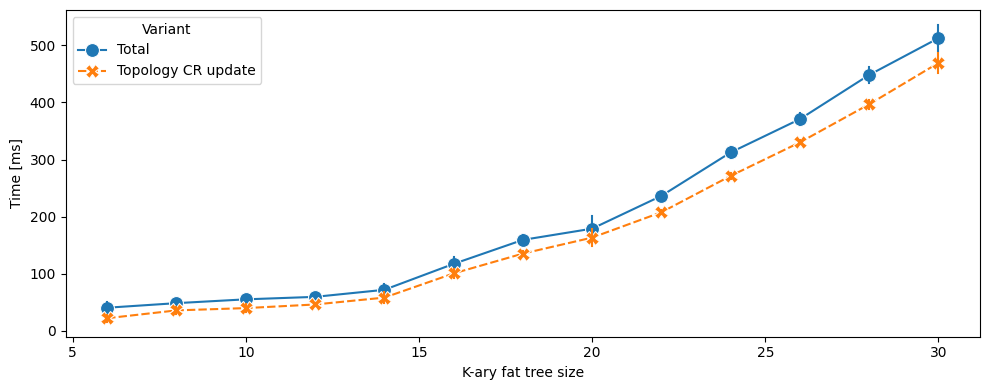

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df = pd.concat([
    df_all[df_all['scenario']=='remove-device-inc-switch'].assign(variant='Total').rename(columns={'total_time_ms': 'y'}),
    df_all[df_all['scenario']=='remove-device-inc-switch'].assign(variant='Topology CR update').rename(columns={'topo_update_time_ms': 'y'}),
])
sns.lineplot(data=df, x='k', y='y', hue='variant', style='variant',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)

ax.set_ylabel('Time [ms]')
ax.set_xlabel('K-ary fat tree size')
ax.legend(title='Variant')
save_fig('remove-inc-switch-time')

/tmp/ipykernel_384977/3961833841.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=df_new_model, x='k', y='total_time_ms', hue='partition_size', style='partition_size',


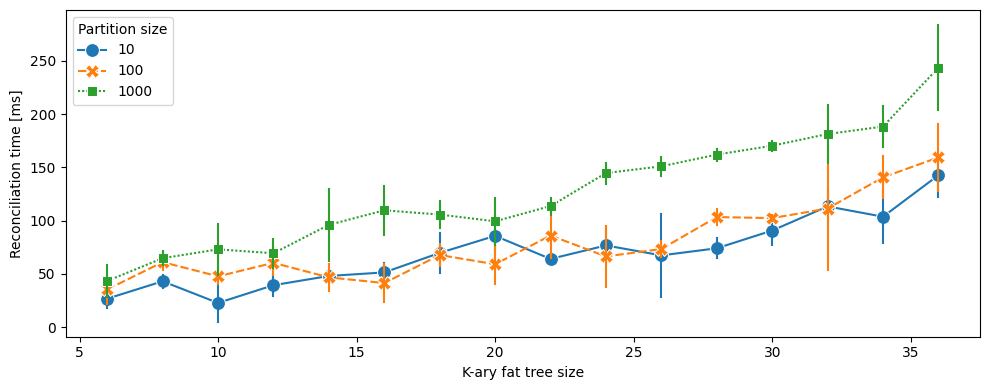

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=df_new_model, x='k', y='total_time_ms', hue='partition_size', style='partition_size',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax, palette=sns.color_palette())
ax.set_ylabel('Reconciliation time [ms]')
ax.set_xlabel('K-ary fat tree size')
ax.legend(title='Partition size', alignment='left')
save_fig('remove-inc-switch-time-partitioned')

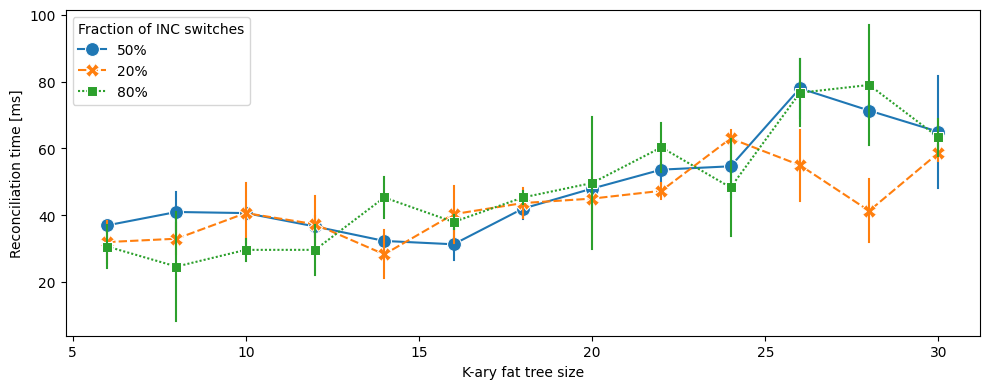

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df = pd.concat([
    df_all[df_all['scenario']=='change-program'],
    df_diff_frac,
])
df['inc_switch_fraction'] = df['inc_switch_fraction'].apply(lambda x: f'{int(x*100)}%')
sns.lineplot(data=df, x='k', y='total_time_ms', hue='inc_switch_fraction', style='inc_switch_fraction',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)

ax.set_ylabel('Reconciliation time [ms]')
ax.set_xlabel('K-ary fat tree size')
ax.legend(title='Fraction of INC switches', alignment='left')
save_fig('change-program-time')

In [58]:
display(df_all[df_all['k'] == 22])
print()
display(df_diff_frac[df_diff_frac['k'] == 22])

,mode_key,k,inc_switch_fraction,scenario,topo_update_time_ms,total_time_ms,num_nodes
72,22-0.5-add-device,22,0.5,add-device,217,245,2662
73,22-0.5-add-device,22,0.5,add-device,196,217,2662
74,22-0.5-add-device,22,0.5,add-device,211,233,2662
75,22-0.5-remove-device-inc-switch,22,0.5,remove-device-inc-switch,204,230,2662
76,22-0.5-remove-device-inc-switch,22,0.5,remove-device-inc-switch,210,239,2662
77,22-0.5-remove-device-inc-switch,22,0.5,remove-device-inc-switch,209,240,2662
78,22-0.5-change-program,22,0.5,change-program,0,48,2662
79,22-0.5-change-program,22,0.5,change-program,0,50,2662
80,22-0.5-change-program,22,0.5,change-program,0,63,2662


,mode_key,k,inc_switch_fraction,scenario,topo_update_time_ms,total_time_ms
48,22-0.2-change-program,22,0.2,change-program,0,46
49,22-0.2-change-program,22,0.2,change-program,0,50
50,22-0.2-change-program,22,0.2,change-program,0,46
51,22-0.8-change-program,22,0.8,change-program,0,52
52,22-0.8-change-program,22,0.8,change-program,0,65
53,22-0.8-change-program,22,0.8,change-program,0,64


<Axes: xlabel='k', ylabel='total_time_ms'>

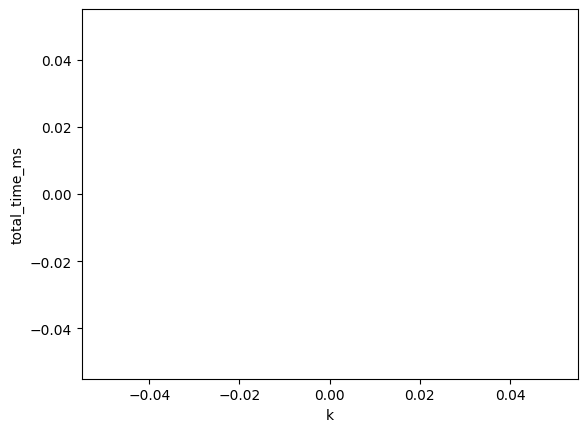

In [59]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data=df_diff_frac[df_diff_frac['scenario'] == 'add-device'], x='k', y='total_time_ms',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)
sns.lineplot(data=df_diff_frac[df_diff_frac['scenario'] == 'add-device'], x='k', y='topo_update_time_ms', 
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)

In [60]:
df_all['scenario'].unique()

array(['add-device', 'remove-device-inc-switch', 'change-program'],
      dtype=object)

<Axes: xlabel='k', ylabel='total_time_ms'>

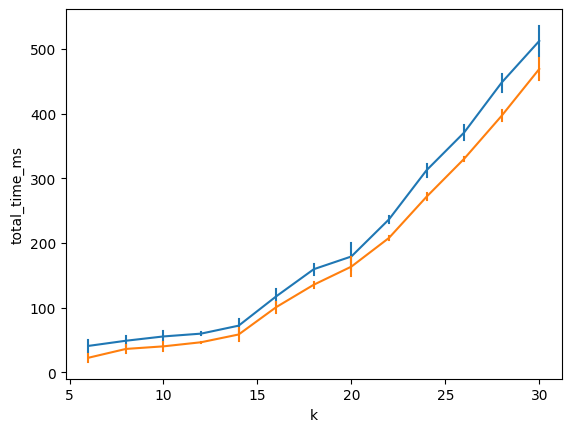

In [61]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data=df_all[df_all['scenario'] == 'remove-device-inc-switch'], x='k', y='total_time_ms',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)
sns.lineplot(data=df_all[df_all['scenario'] == 'remove-device-inc-switch'], x='k', y='topo_update_time_ms', 
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax)

<Axes: xlabel='k', ylabel='total_time_ms'>

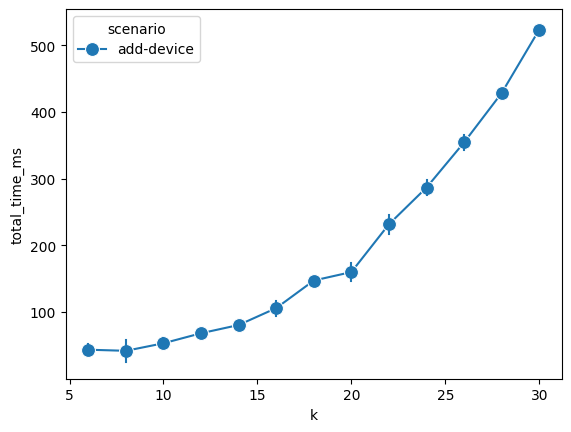

In [62]:
sns.lineplot(data=df_all[df_all['scenario'] == 'add-device'], x='k', y='total_time_ms', style='scenario',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True)

<Axes: xlabel='k', ylabel='total_time_ms'>

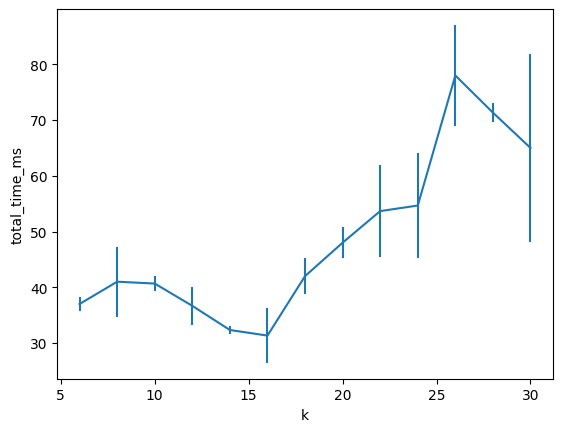

In [63]:
sns.lineplot(data=df_all[df_all['scenario'] == 'change-program'], x='k', y='total_time_ms', 
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True)